In [1]:
library('Seurat')

library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('readr')

library('gghighlight')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [7]:
pbmc.data <- Read10X(data.dir="../data/seurat-tutorial/filtered_gene_bc_matrices/hg19/")

pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features)

In [8]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

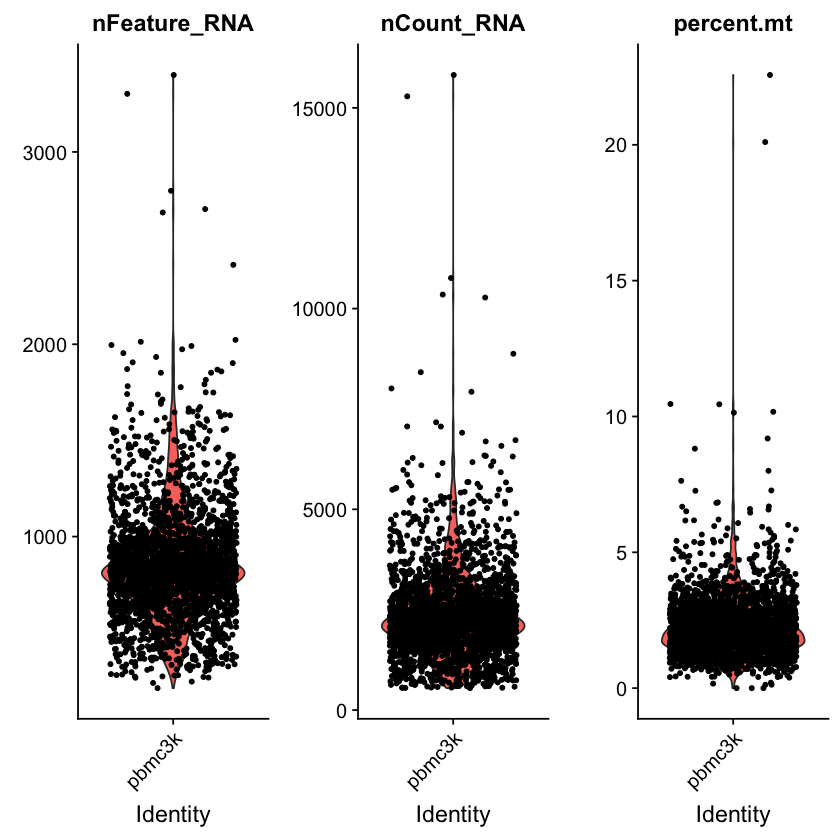

In [9]:
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

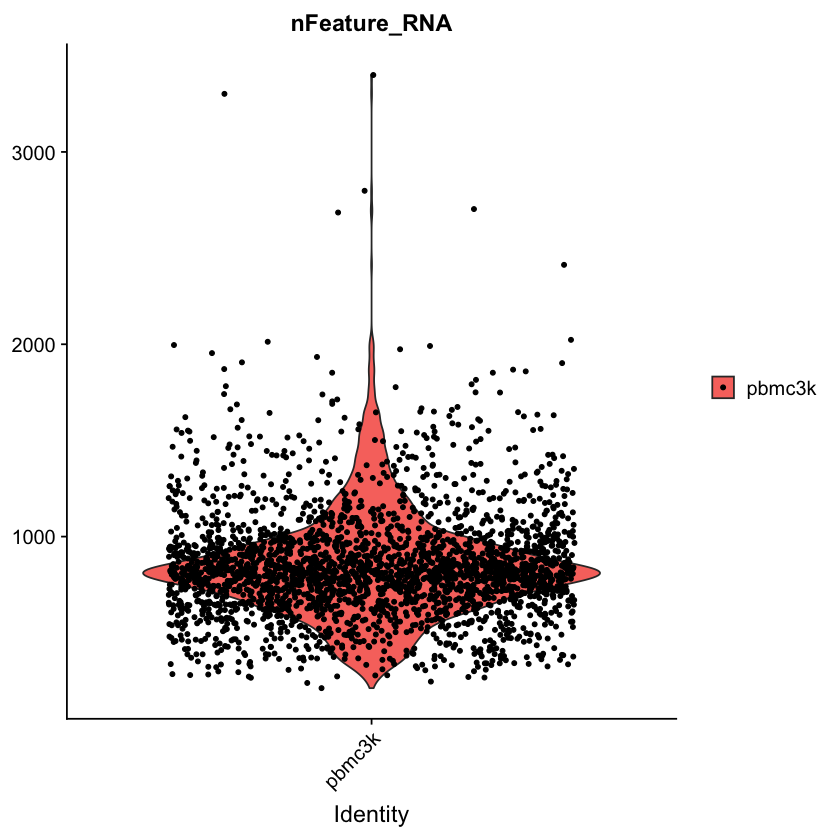

In [10]:
VlnPlot(pbmc, features = c("nFeature_RNA"), ncol = 1)

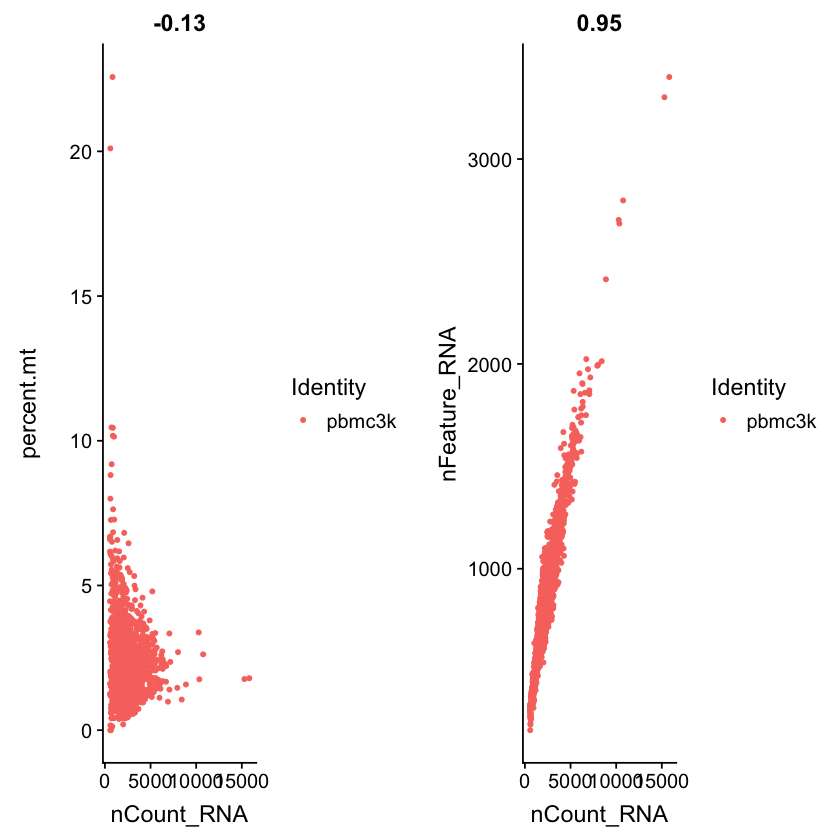

In [11]:
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [12]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

In [13]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

Warning message:
“Transformation introduced infinite values in continuous x-axis”

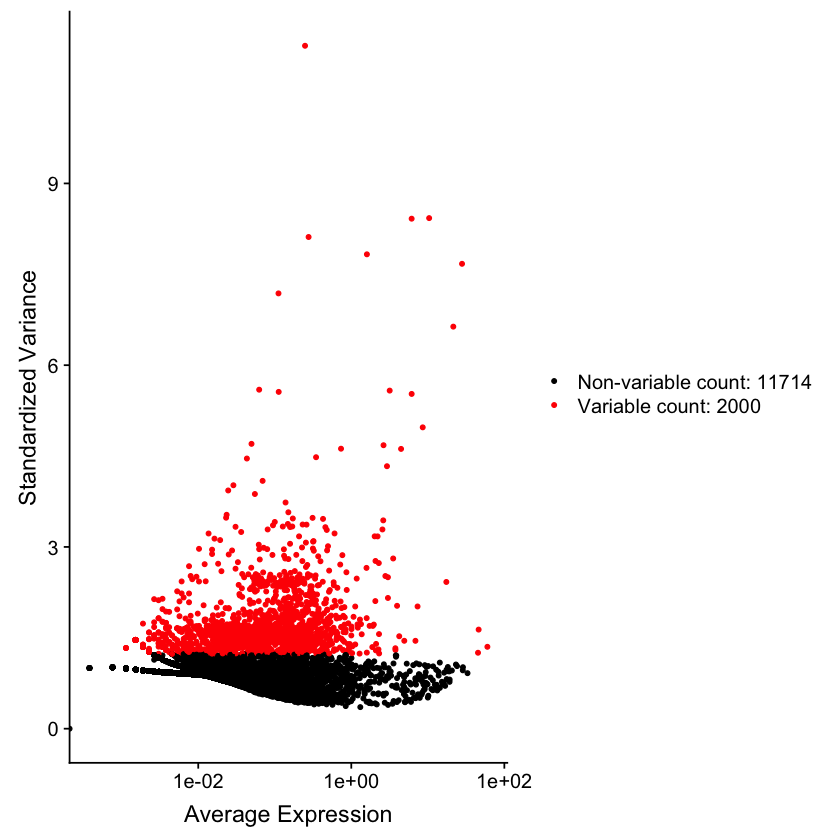

In [15]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
VariableFeaturePlot(pbmc)

When using repel, set xnudge and ynudge to 0 for optimal results
Warning message:
“Transformation introduced infinite values in continuous x-axis”

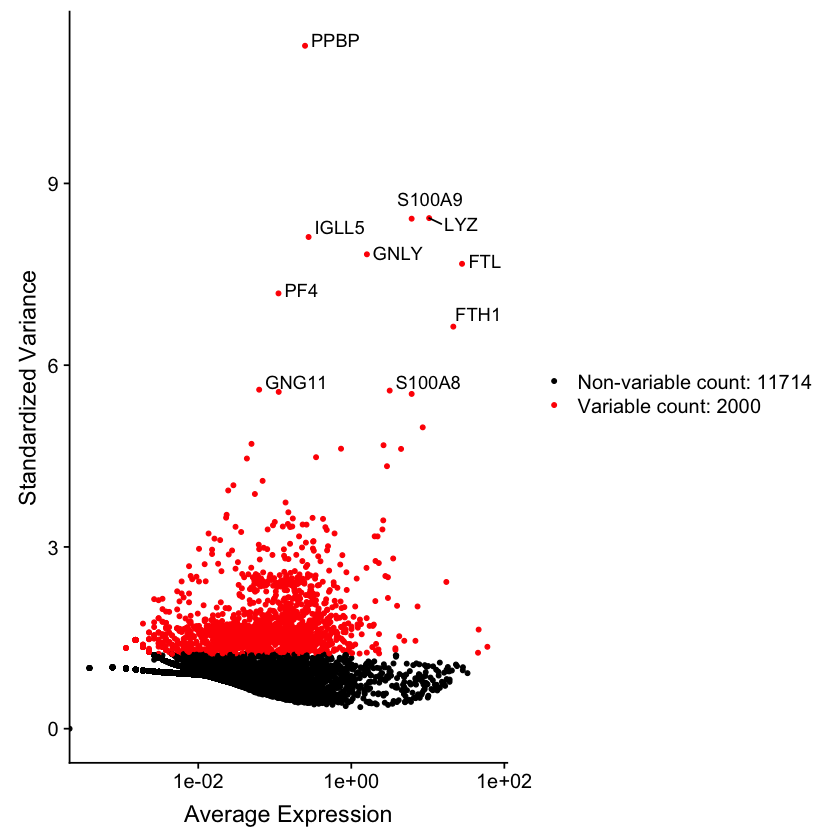

In [16]:
LabelPoints(plot = plot1, points = top10, repel = TRUE)

In [17]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix


In [18]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

In [19]:
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


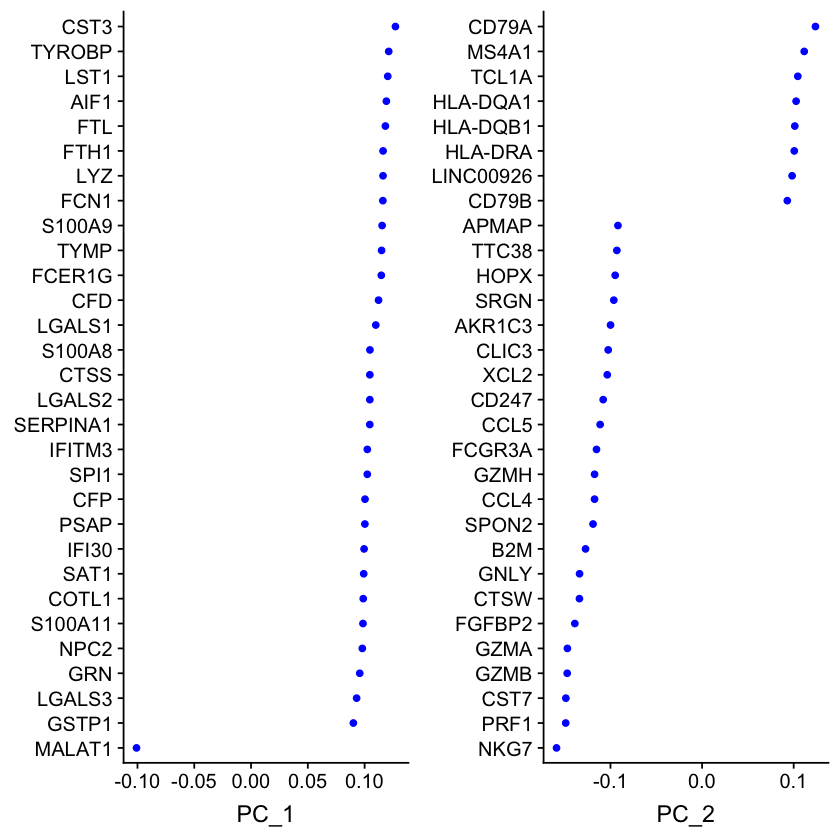

In [20]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

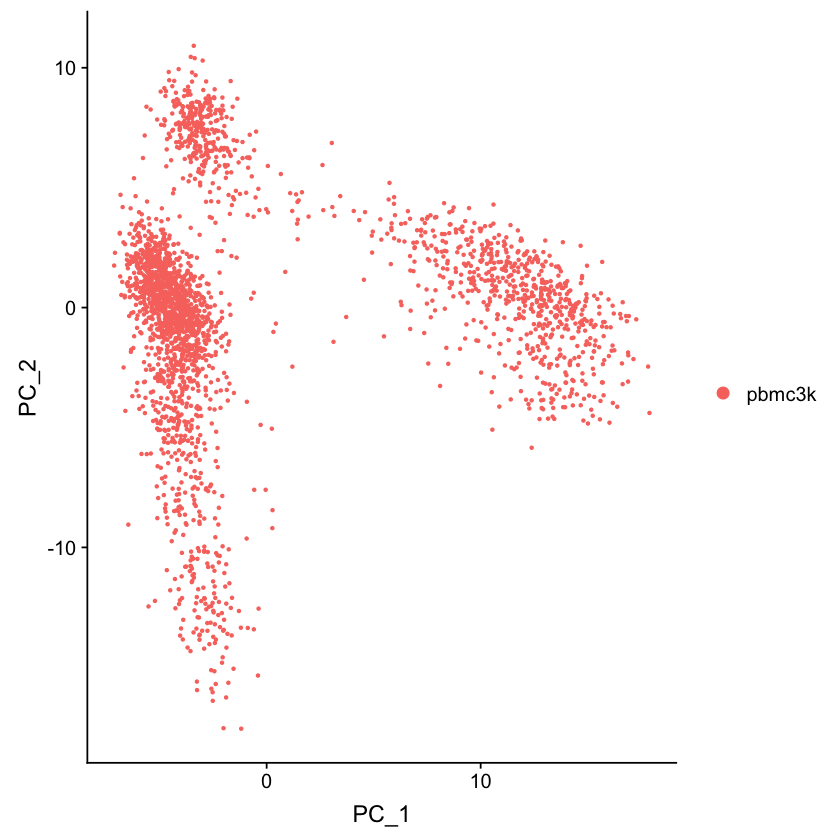

In [21]:
DimPlot(pbmc, reduction = "pca")

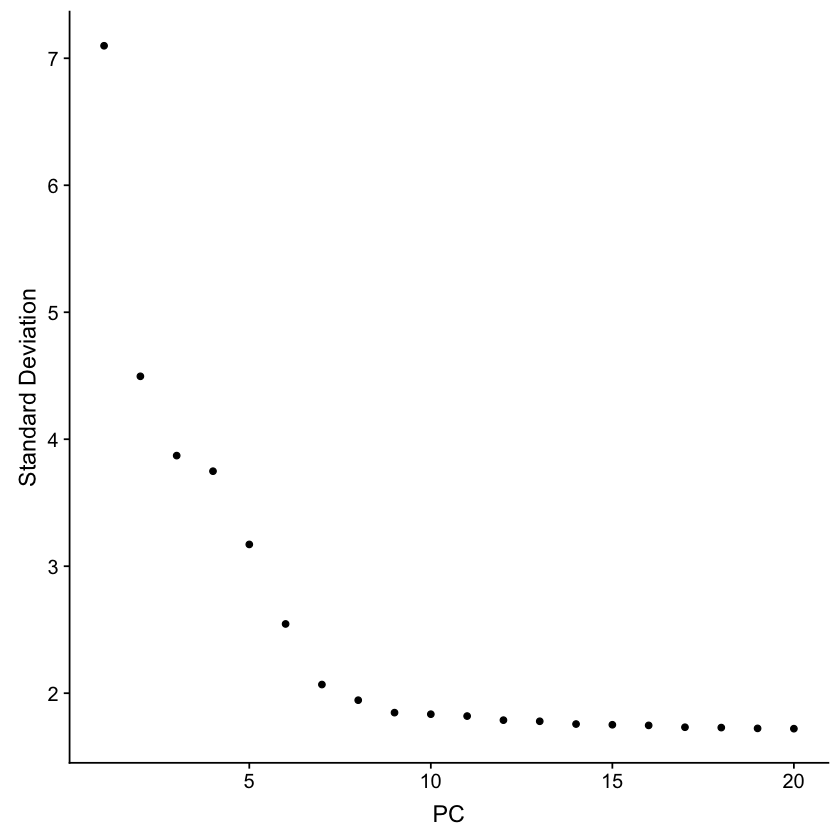

In [22]:
ElbowPlot(pbmc)

In [23]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95937

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 1 seconds


In [24]:
pbmc <- RunUMAP(pbmc, dims = 1:10)


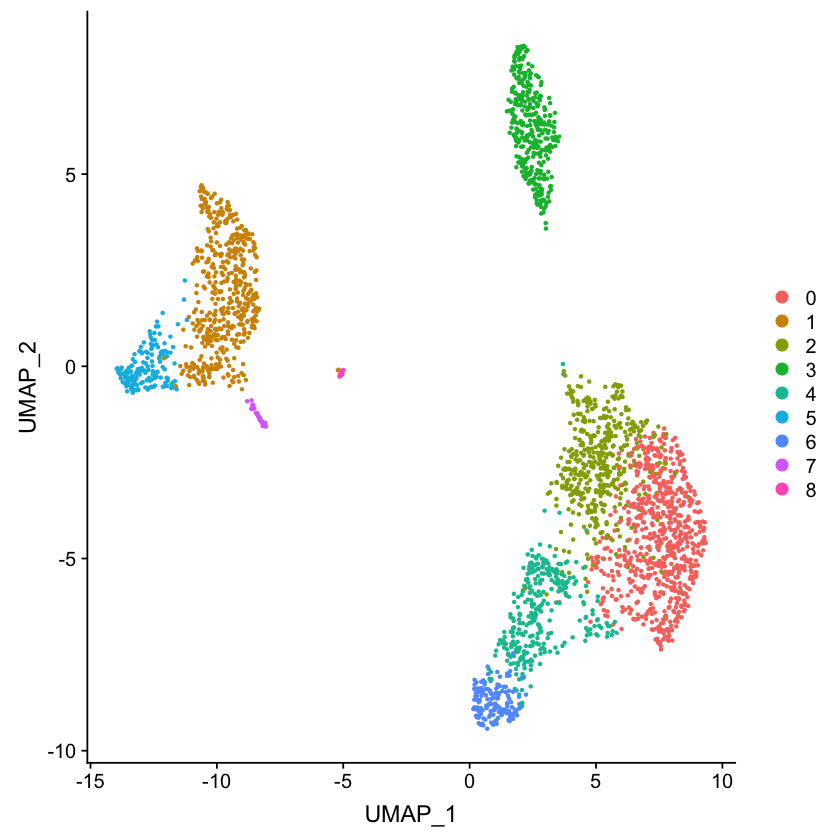

In [25]:
DimPlot(pbmc, reduction = "umap")

In [26]:
saveRDS(pbmc, file = "../data/pbmc_tutorial.rds")

In [27]:
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8


p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
7.468943e-120,0.7698980,0.917,0.587,1.024291e-115,0,LDHB
2.808551e-87,0.9323437,0.443,0.107,3.851647e-83,0,CCR7
0.000000e+00,3.8608733,0.996,0.215,0.000000e+00,1,S100A9
0.000000e+00,3.7966403,0.975,0.121,0.000000e+00,1,S100A8
4.812603e-82,0.8695514,0.982,0.646,6.600003e-78,2,LTB
8.953443e-56,0.8559793,0.423,0.114,1.227875e-51,2,AQP3
0.000000e+00,2.9875833,0.936,0.041,0.000000e+00,3,CD79A
9.481783e-271,2.4894932,0.622,0.022,1.300332e-266,3,TCL1A
1.647227e-199,2.1375668,0.958,0.232,2.259008e-195,4,CCL5
4.927694e-181,2.1538083,0.584,0.051,6.757839e-177,4,GZMK


In [31]:
pbmc.markers %>% group_by(cluster) %>% top_n(n = 4, wt = avg_logFC)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
7.468943e-120,0.7698980,0.917,0.587,1.024291e-115,0,LDHB
2.808551e-87,0.9323437,0.443,0.107,3.851647e-83,0,CCR7
5.424288e-50,0.7332917,0.336,0.103,7.438869e-46,0,LEF1
1.383211e-45,0.7169001,0.333,0.109,1.896935e-41,0,PRKCQ-AS1
0.000000e+00,3.8608733,0.996,0.215,0.000000e+00,1,S100A9
0.000000e+00,3.7966403,0.975,0.121,0.000000e+00,1,S100A8
0.000000e+00,2.6342945,0.908,0.059,0.000000e+00,1,LGALS2
1.070384e-267,3.1534495,1.000,0.517,1.467924e-263,1,LYZ
4.812603e-82,0.8695514,0.982,0.646,6.600003e-78,2,LTB
7.339337e-63,0.8118752,0.746,0.332,1.006517e-58,2,IL7R


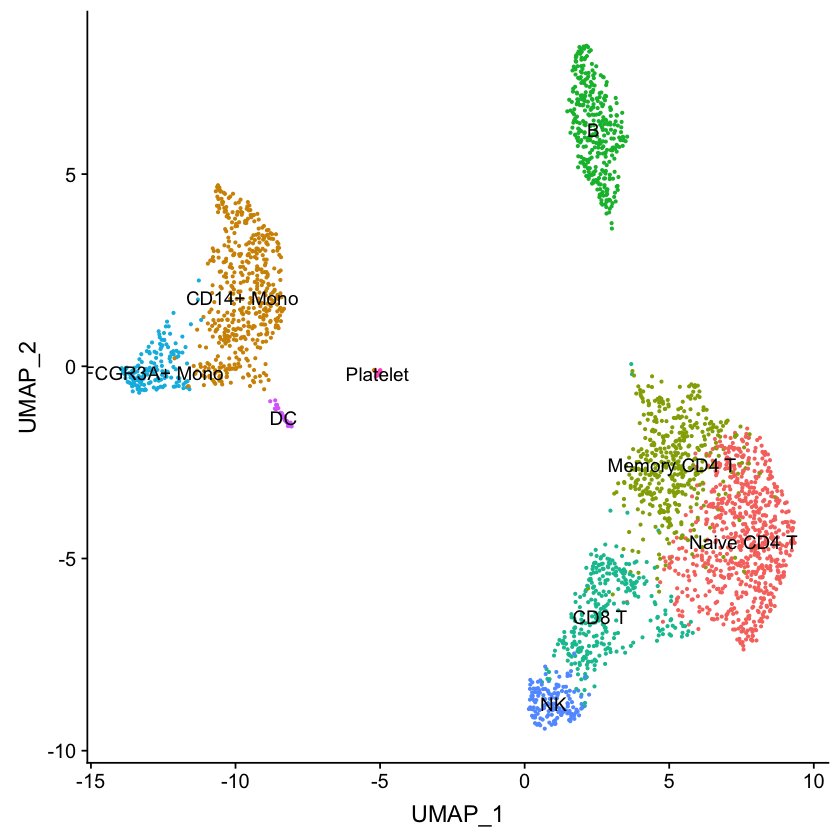

In [33]:
new.cluster.ids <- c("Naive CD4 T",
                     "CD14+ Mono",
                     "Memory CD4 T",
                     "B",
                     "CD8 T",
                     "FCGR3A+ Mono",
                     "NK",
                     "DC",
                     "Platelet")

names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

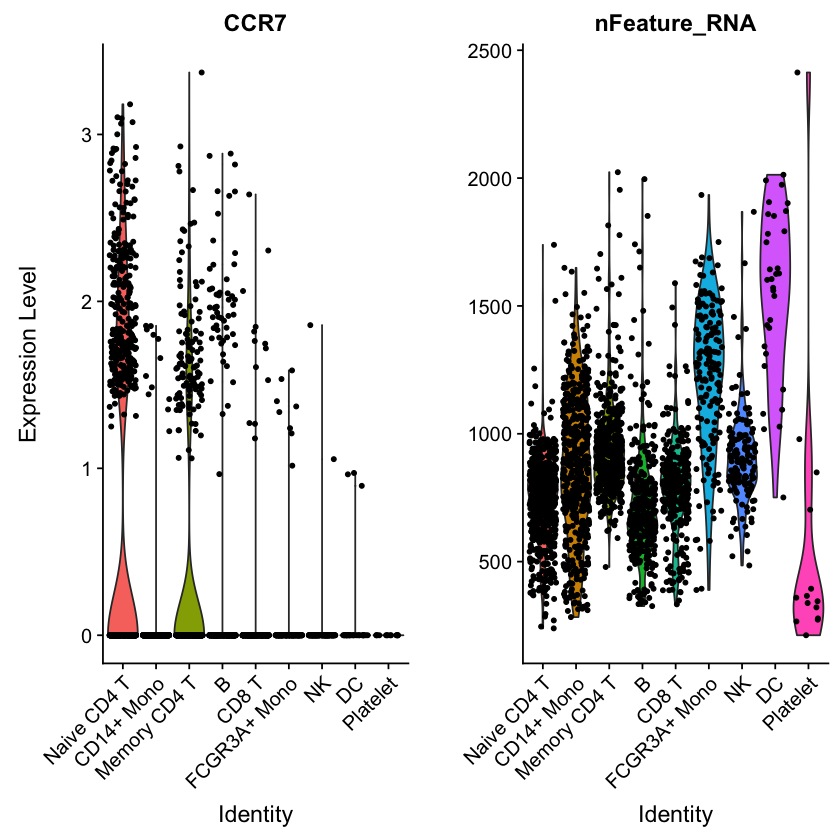

In [34]:
VlnPlot(pbmc, features = c("CCR7", "nFeature_RNA"))

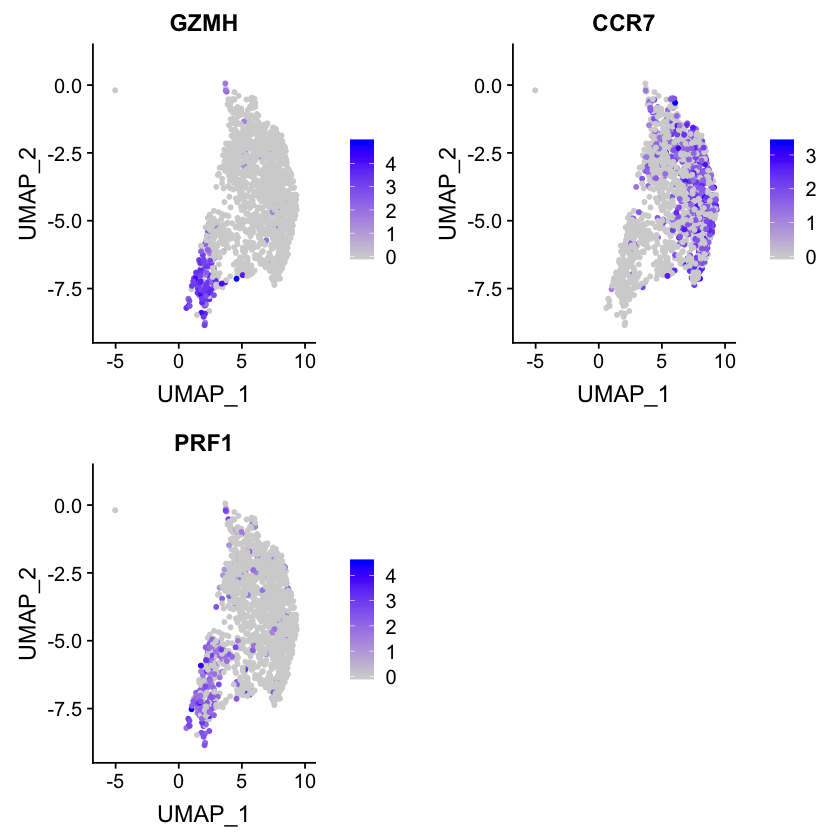

In [36]:
pbmc.T <-
    subset(
        pbmc,
        idents = c("Memory CD4 T", "Naive CD4 T", "CD8 T")
    )

FeaturePlot(
    pbmc.T,
    features=c("GZMH", "CCR7", "PRF1")
)

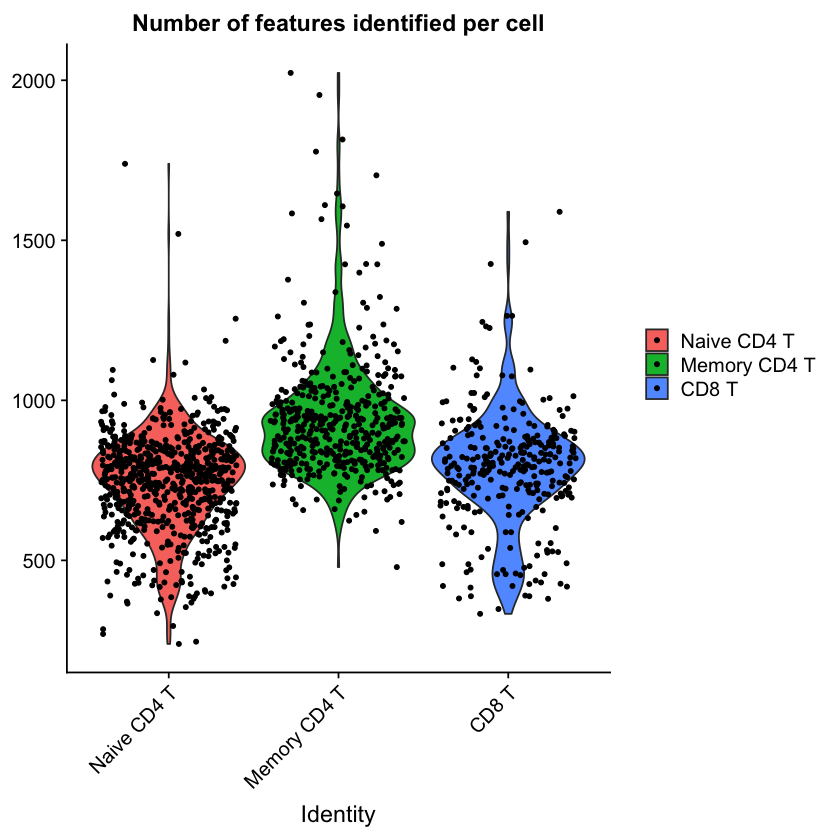

In [39]:
VlnPlot(pbmc.T, features = c("nFeature_RNA")) +
    labs(title="Number of features identified per cell")